<a href="https://colab.research.google.com/github/404himel/CNN/blob/main/classification_CIFAR10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import layers,models,datasets
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [49]:

y_test.shape

(10000, 1)

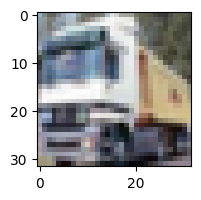

In [11]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[1])

In [12]:
x_train = x_train/255.0
x_test = x_test/255.0

In [13]:
y_train.shape

(50000, 1)

In [17]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [18]:
y_train = y_train.reshape(-1,)

In [24]:
#cnn
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization #Fixed typo here
model = Sequential()

In [26]:
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
histroy = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 92ms/step - accuracy: 0.3833 - loss: 1.6851 - val_accuracy: 0.6026 - val_loss: 1.1441
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 198s 90ms/step - accuracy: 0.6406 - loss: 1.0436 - val_accuracy: 0.6825 - val_loss: 0.9321
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 90ms/step - accuracy: 0.7050 - loss: 0.8523 - val_accuracy: 0.6945 - val_loss: 0.8762
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 90ms/step - accuracy: 0.7389 - loss: 0.7457 - val_accuracy: 0.7206 - val_loss: 0.8203
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 90ms/step - accuracy: 0.7675 - loss: 0.6657 - val_accuracy: 0.7203 - val_loss: 0.8228
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 91ms/step - accuracy: 0.7876 - loss: 0.6049 - val_accuracy: 0.7293 - val_loss: 0.8243
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 90ms/step - accuracy: 0.8083 - loss: 0.5440 - val_accuracy: 0.7267 - val_loss: 0.8375
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 91ms/step - accuracy: 

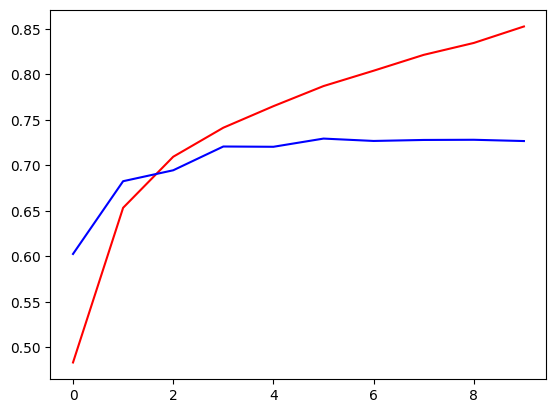

In [29]:
import matplotlib.pyplot as plt
plt.plot(histroy.history['accuracy'],color='red',label='train')
plt.plot(histroy.history['val_accuracy'],color='blue',label='validation')
plt.show()

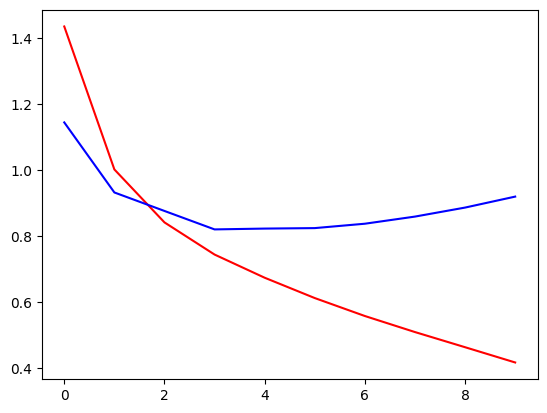

In [30]:
import matplotlib.pyplot as plt
plt.plot(histroy.history['loss'],color='red',label='train')
plt.plot(histroy.history['val_loss'],color='blue',label='validation')
plt.show()

In [32]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.7282 - loss: 0.9085


[0.9195765852928162, 0.7265999913215637]

In [33]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [37]:
y_pred = model.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step


array([[2.36442967e-04, 6.65566859e-06, 1.28953264e-03, 9.86811042e-01,
        6.24038876e-06, 8.68854206e-03, 2.93524400e-03, 3.14555706e-07,
        2.54776041e-05, 5.25248140e-07],
       [5.92763126e-06, 3.06564849e-04, 7.12834414e-09, 4.53409488e-09,
        1.17735014e-11, 6.86152107e-11, 8.90870548e-13, 5.38268865e-12,
        9.99663353e-01, 2.41419530e-05],
       [2.25883704e-02, 4.69128508e-03, 3.32520751e-04, 2.13828025e-04,
        1.67023845e-03, 4.43603349e-05, 2.52333302e-06, 7.99539048e-05,
        9.63418067e-01, 6.95887581e-03],
       [9.65497494e-01, 1.43246204e-02, 2.76698793e-05, 7.25742848e-06,
        4.56955036e-07, 6.85610416e-07, 5.58046978e-08, 3.71847051e-07,
        1.99267995e-02, 2.14486237e-04],
       [1.03183609e-07, 8.45233371e-05, 9.40755978e-02, 2.24232138e-03,
        5.80055177e-01, 6.56506454e-04, 3.22883964e-01, 6.63243904e-09,
        1.65755421e-06, 1.06881387e-07]], dtype=float32)

In [38]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [39]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [41]:
classes[y_classes[3]]

'airplane'

In [42]:
classes[y_classes[3]]

'airplane'

In [43]:
classes[y_classes[4]]

'deer'

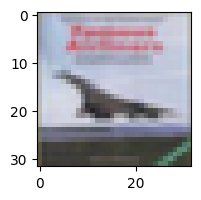

In [51]:
plt.figure(figsize=(15,2))
plt.imshow(x_test[3])